# Indicators

## Source

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import sma_indicator, ema_indicator, MACD, adx
from  ta.momentum import rsi, williams_r
from  ta.volume import chaikin_money_flow
from  ta.volatility import average_true_range, KeltnerChannel, bollinger_hband, bollinger_lband, bollinger_mavg

In [2]:
btc_yahoo = pd.read_csv('/home/giujorge/datalake/lab/Crypto/crypto/data/external/yahoo/daily/usd/BTC-USD.csv', parse_dates=True, index_col=0)
btc_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


##  Trend

### SMA

#### SMA 100 : Big Pirce Dip

In [5]:
btc_yahoo['SMA100'] = sma_indicator(btc_yahoo['Adj Close'], window = 100)

#### SMA 200 : Last Stand in an uptrand or downtrent

In [6]:
btc_yahoo['SMA200'] = sma_indicator(btc_yahoo['Adj Close'], window = 200)

#### VIZ

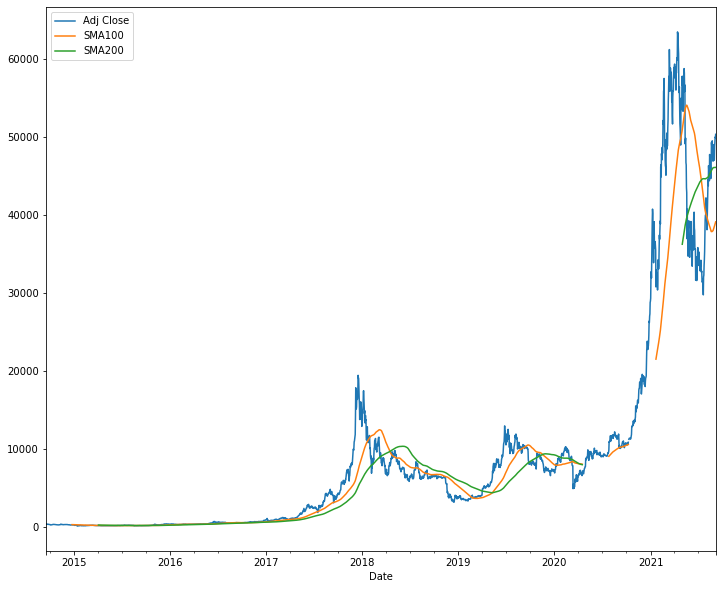

In [7]:
btc_yahoo[['Adj Close','SMA100','SMA200']].plot(figsize=(12,10))
plt.show()

### EMA

#### EMA 5 : Momentum

In [12]:
btc_yahoo['EMA5'] = ema_indicator(btc_yahoo['Adj Close'], window = 5)

#### EMA 10 : Short term trend

In [13]:
btc_yahoo['EMA10'] = ema_indicator(btc_yahoo['Adj Close'], window = 10)

#### EMA 20 : reversion to the mean

In [14]:
btc_yahoo['EMA20'] = ema_indicator(btc_yahoo['Adj Close'], window = 20)

#### EMA 30 : Swing filter

In [15]:
btc_yahoo['EMA30'] = ema_indicator(btc_yahoo['Adj Close'], window = 30)

#### EMA 50 : Pullback in uptrend

In [17]:
btc_yahoo['EMA50'] = ema_indicator(btc_yahoo['Adj Close'], window = 50)

#### ViZ

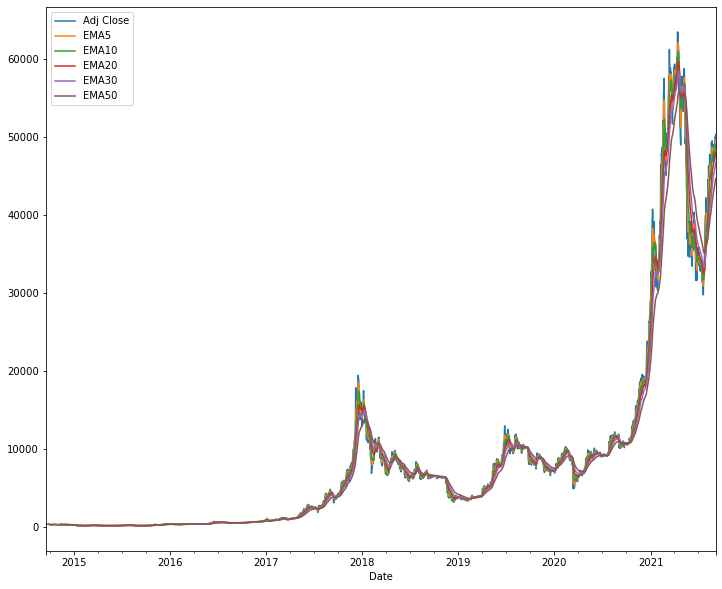

In [18]:
btc_yahoo[['Adj Close','EMA5','EMA10','EMA20','EMA30','EMA50']].plot(figsize=(12,10))
plt.show()

###  Moving Average Convergence/Divergence : Price swings

In [22]:
btc_yahoo['MACD'] =  MACD(btc_yahoo['Adj Close'], 6, 12,9)

###  Average Directional Movement Index

In [26]:
btc_yahoo['ADX'] = adx(btc_yahoo['High'],btc_yahoo['Low'], btc_yahoo['Adj Close'], 14)

## Momentum Indicators

### Relative Strength Index

In [29]:
btc_yahoo['ADX'] = rsi(btc_yahoo['Adj Close'], 14)

### Williams' %R

In [36]:
btc_yahoo['WILLR'] = williams_r(btc_yahoo['High'],btc_yahoo['Low'], btc_yahoo['Adj Close'],14)

## Volume Indicators

In [37]:
btc_yahoo['CMF'] = chaikin_money_flow(btc_yahoo['High'], btc_yahoo['Low'], btc_yahoo['Adj Close'], btc_yahoo['Volume'], 14)

## Volatility Indicators

### Average True Range

In [43]:
btc_yahoo['ATR'] = average_true_range(btc_yahoo['High'], btc_yahoo['Low'], btc_yahoo['Adj Close'], 14)

### Keltner Channel (KC)

In [51]:
btc_yahoo['KC'] = KeltnerChannel(btc_yahoo['High'], btc_yahoo['Low'], btc_yahoo['Adj Close'], window = 20, window_atr= 10, original_version = True)

In [68]:
btc_yahoo['KC']

Date
2014-09-17    <ta.volatility.KeltnerChannel object at 0x7f96...
2014-09-18    <ta.volatility.KeltnerChannel object at 0x7f96...
2014-09-19    <ta.volatility.KeltnerChannel object at 0x7f96...
2014-09-20    <ta.volatility.KeltnerChannel object at 0x7f96...
2014-09-21    <ta.volatility.KeltnerChannel object at 0x7f96...
                                    ...                        
2021-09-01    <ta.volatility.KeltnerChannel object at 0x7f96...
2021-09-02    <ta.volatility.KeltnerChannel object at 0x7f96...
2021-09-03    <ta.volatility.KeltnerChannel object at 0x7f96...
2021-09-04    <ta.volatility.KeltnerChannel object at 0x7f96...
2021-09-05    <ta.volatility.KeltnerChannel object at 0x7f96...
Name: KC, Length: 2546, dtype: object

### Bollinger Bands

In [65]:
btc_yahoo['BBH'] = bollinger_hband(btc_yahoo['Adj Close'], window = 5, window_dev= 2)

In [66]:
btc_yahoo['BBL'] = bollinger_lband(btc_yahoo['Adj Close'], window = 5, window_dev= 2)

In [67]:
btc_yahoo['BBMAVG'] = bollinger_mavg(btc_yahoo['Adj Close'], window = 5)